## load neccesary  libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 


## Line graph (loading data)

[]

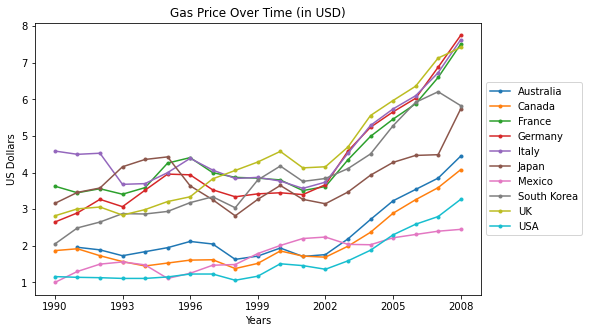

In [32]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5))

plt.title('Gas Price Over Time (in USD)')

#gas.year(Y-axis), gas.countries(x-axis)

#plt.plot(gas.Year,gas.USA, 'b.-', label ='USA')
#plt.plot(gas.Year, gas.Canada,'r.-', label ='Canada')
#plt.plot(gas.Year, gas['South Korea'],'g.-', label ='South Korea') # use this syntax for two entries 

#write a funcion to do all that.

for country in gas:
    if country != 'Year':
        plt.plot(gas.Year, gas[country], marker='.', label=country)

#the the ticks skeep every three year on the X-axis
plt.xticks(gas.Year[::3])

plt.xlabel('Years')
plt.ylabel('US Dollars')

#the code inaside moves legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.plot()
